In [67]:
using CSV
using DrWatson
using DataFrames
using Interpolations
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
ERROR: LoadError: InitError: UndefVarError: register_error_hint not defined
Stacktrace:
 [1] register_hints() at /home/max/.julia/packages/ColorTypes/vfl08/src/error_hints.jl:4
 [2] __init__() at /home/max/.julia/packages/ColorTypes/vfl08/src/ColorTypes.jl:89
 [3] top-level scope at none:2
 [4] eval at ./boot.jl:331 [inlined]
during initialization of module ColorTypes
in expression starting at /home/max/.julia/packages/GeometryTypes/4bgJU/src/GeometryTypes.jl:4
ERROR: LoadError: Failed to precompile GeometryTypes [4d00f742-c7ba-57c2-abde-4428a4b178cb] to /home/max/.julia/compiled/v1.5/GeometryTypes/OuQ1Z_Ulo5O.ji.
Stacktrace:
 [1] top-level scope at none:2
 [2] eval at ./boot.jl:331 [inlined]
in expression starting at /home/max/.julia/packages/Plots/cc8wh/src/Plots.jl:7


LoadError: Failed to precompile Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] to /home/max/.julia/compiled/v1.5/Plots/ld3vC_Ulo5O.ji.

In [79]:
file = CSV.File(datadir("experiment/SBA15_water_acetonitrile_init_all.csv"), delim=",");

In [80]:
O_12_filtered = convert(Array{Float64,1},filter(x -> !isa(x,Missing),file.O_12))
O_10_filtered = convert(Array{Float64,1},filter(x -> !isa(x,Missing),file.O_10))
O_8_filtered = convert(Array{Float64,1},filter(x -> !isa(x,Missing),file.O_8))
t_O_filtered = convert(Array{Int64,1},filter(x -> !isa(x,Missing),file.t_O))

501-element Array{Int64,1}:
    0
    2
    4
    6
    8
   10
   12
   14
   16
   18
   20
   22
   24
    ⋮
  978
  980
  982
  984
  986
  988
  990
  992
  994
  996
  998
 1000

In [81]:
interp_linear_12 = LinearInterpolation(t_O_filtered, O_12_filtered);
interp_linear_10 = LinearInterpolation(t_O_filtered, O_10_filtered);
interp_linear_8 = LinearInterpolation(t_O_filtered, O_8_filtered);

In [83]:
int_O_12 = [interp_linear_12(t) for t in file.t_I]
int_O_10 = [interp_linear_10(t) for t in file.t_I]
int_O_8 = [interp_linear_8(t) for t in file.t_I]

1001-element Array{Float64,1}:
 0.0
 0.000565
 0.00113
 0.001375
 0.00162
 0.00162
 0.00162
 0.00162
 0.00162
 0.0018599999999999999
 0.0021
 0.0018599999999999999
 0.00162
 ⋮
 0.98478
 0.98478
 0.98478
 0.98478
 0.98478
 0.98478
 0.98478
 0.98478
 0.98478
 0.98478
 0.98478
 0.98478

In [84]:
df1 = DataFrame(time = file.t_I, Input_12 = file.I_12, Input_10 = file.I_10, Input_8 = file.I_8, Output_12 = int_O_12, Output_10 = int_O_10, Output_8 = int_O_8)

,time,Input_12,Input_10,Input_8,Output_12,Output_10,Output_8
,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,0,1.51e-5,1.52e-5,1.53e-5,0.0041,0.00105,0.0
2,1,1.53e-5,1.54e-5,1.55e-5,0.004175,0.001275,0.000565
3,2,1.56e-5,1.56e-5,1.57e-5,0.00425,0.0015,0.00113
4,3,1.59e-5,1.59e-5,1.58e-5,0.004095,0.0015,0.001375
5,4,1.62e-5,1.61e-5,1.6e-5,0.00394,0.0015,0.00162
6,5,1.65e-5,1.64e-5,1.62e-5,0.00386,0.001275,0.00162
7,6,1.68e-5,1.66e-5,1.64e-5,0.00378,0.00105,0.00162
8,7,1.72e-5,1.69e-5,1.67e-5,0.003625,0.001275,0.00162
9,8,1.75e-5,1.72e-5,1.69e-5,0.00347,0.0015,0.00162


In [85]:
CSV.write(datadir("experiment/SBA15_water_acetonitrile_interp_all.csv"),df1)

"/home/max/repos/advection-diffusion-catalysis/data/experiment/SBA15_water_acetonitrile_interp_all.csv"

In [86]:
df2 = DataFrame(T = file.t_I, I = file.I_12, O = int_O_12)

,T,I,O
,Int64,Float64,Float64
1,0,1.51e-5,0.0041
2,1,1.53e-5,0.004175
3,2,1.56e-5,0.00425
4,3,1.59e-5,0.004095
5,4,1.62e-5,0.00394
6,5,1.65e-5,0.00386
7,6,1.68e-5,0.00378
8,7,1.72e-5,0.003625
9,8,1.75e-5,0.00347


In [87]:
CSV.write(datadir("experiment/SBA15_water_acetonitrile_interp_12.csv"),df2)

"/home/max/repos/advection-diffusion-catalysis/data/experiment/SBA15_water_acetonitrile_interp_12.csv"

In [88]:
df3 = DataFrame(T = file.t_I, I = file.I_10, O = int_O_10)

,T,I,O
,Int64,Float64,Float64
1,0,1.52e-5,0.00105
2,1,1.54e-5,0.001275
3,2,1.56e-5,0.0015
4,3,1.59e-5,0.0015
5,4,1.61e-5,0.0015
6,5,1.64e-5,0.001275
7,6,1.66e-5,0.00105
8,7,1.69e-5,0.001275
9,8,1.72e-5,0.0015


In [89]:
CSV.write(datadir("experiment/SBA15_water_acetonitrile_interp_10.csv"),df3)

"/home/max/repos/advection-diffusion-catalysis/data/experiment/SBA15_water_acetonitrile_interp_10.csv"

In [90]:
df4 = DataFrame(T = file.t_I, I = file.I_8, O = int_O_8)

,T,I,O
,Int64,Float64,Float64
1,0,1.53e-5,0.0
2,1,1.55e-5,0.000565
3,2,1.57e-5,0.00113
4,3,1.58e-5,0.001375
5,4,1.6e-5,0.00162
6,5,1.62e-5,0.00162
7,6,1.64e-5,0.00162
8,7,1.67e-5,0.00162
9,8,1.69e-5,0.00162


In [91]:
CSV.write(datadir("experiment/SBA15_water_acetonitrile_interp_8.csv"),df3)

"/home/max/repos/advection-diffusion-catalysis/data/experiment/SBA15_water_acetonitrile_interp_8.csv"

In [20]:
file1 = CSV.File(datadir("experiment/SBA15_interp_8.csv"), delim=",")
o1 = Float64[]
o2 = Float64[]
time = Float64[]
time2 = Float64[]
for row in file1
    push!(time,row.T) 
    push!(o1,row.O) 
end
file2 = CSV.File(datadir("experiment/init_output_data.csv"), delim="\t")
for row in file2
    push!(o2,row.O_8) 
    push!(time2,row.t)
end
time2

501-element Array{Float64,1}:
    0.0
    2.0
    4.0
    6.0
    8.0
   10.0
   12.0
   14.0
   16.0
   18.0
   20.0
   22.0
   24.0
    ⋮
  978.0
  980.0
  982.0
  984.0
  986.0
  988.0
  990.0
  992.0
  994.0
  996.0
  998.0
 1000.0

In [96]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
ERROR: LoadError: InitError: UndefVarError: register_error_hint not defined
Stacktrace:
 [1] register_hints() at /home/max/.julia/packages/ColorTypes/vfl08/src/error_hints.jl:4
 [2] __init__() at /home/max/.julia/packages/ColorTypes/vfl08/src/ColorTypes.jl:89
 [3] top-level scope at none:2
 [4] eval at ./boot.jl:331 [inlined]
during initialization of module ColorTypes
in expression starting at /home/max/.julia/packages/GeometryTypes/4bgJU/src/GeometryTypes.jl:4
ERROR: LoadError: Failed to precompile GeometryTypes [4d00f742-c7ba-57c2-abde-4428a4b178cb] to /home/max/.julia/compiled/v1.5/GeometryTypes/OuQ1Z_Ulo5O.ji.
Stacktrace:
 [1] top-level scope at none:2
 [2] eval at ./boot.jl:331 [inlined]
in expression starting at /home/max/.julia/packages/Plots/cc8wh/src/Plots.jl:7


LoadError: Failed to precompile Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] to /home/max/.julia/compiled/v1.5/Plots/ld3vC_Ulo5O.ji.

In [92]:
plot(file.t_I,int_O_12,label = "interpolated 12");
plot!(file.t_O, file.O_12,label = "initial")

LoadError: UndefVarError: plot not defined

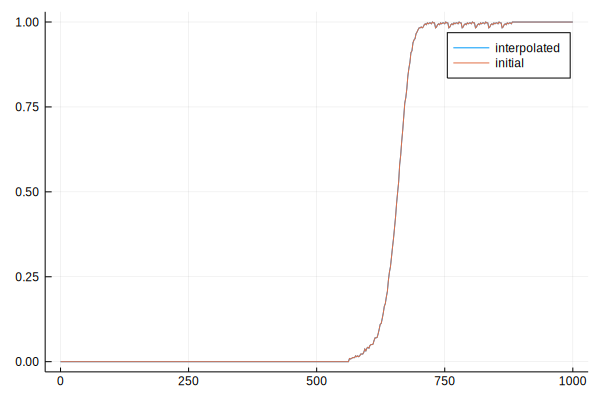